In [1]:
import warnings
warnings.filterwarnings('ignore')

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np

import torchvision.datasets as datasets 
import torchvision.transforms as transforms
import time

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cpu device


# MNIST HAND WRITTEN NUMBER

Define various neural network structures with tanh, sigmoid, linear, relu, define number of neurons in each layer and forward the input data to one-hot-coding for numbers 0-9. **You are NOT expected to use Convolution Layers!** <br>
*Hint: Input files are 28x28 images.*
<br>
*Hint: Use .view method in the forward function to make a column vector from 28x28 image*


In this assignment, you are expected to train your own Neural Network model. You are free to refer to resources online and bogaziciai github repository while constructing your neural network.  

In [3]:
## Normalization and create a tensor for a training/test set 

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])


mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

5.6%

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



11.9%

100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



### Step 1

Defining the structure of the neural network.

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.layer1 = nn.Linear(28*28, 1000)
        self.layer2 = nn.Linear(1000, 100)
        self.out = nn.Linear(100, 10)
    def forward(self, x): #convert + flatten
        x = F.relu(self.layer1(x))
        x = F.sigmoid(self.layer2(x))
        return F.softmax(self.out(x))

        # view() reshapes the tensor without copying memory, similar to numpy's reshape().
        
        # forward propagation

In [5]:
model=Net()

### Step 2

Deciding on the optimizer, number of batches, loss function and the number of epochs

In [6]:
model=Net().to(device)

loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum = 0.9)
batch_size = 64
epochs = 15
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=True)

### Step 3
Start the training.

In [7]:
for epoch in range(epochs):
    running_loss = 0.0
    for i,x_train in enumerate(train_loader):
        inputs, labels = x_train
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        output = model(inputs.view(-1,28*28))
        losses = loss(output, labels)
        losses.backward()
        optimizer.step()
        running_loss += losses.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.5f' %
            (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0        
print('Finished Training') 

[1,   100] loss: 2.29950
[1,   200] loss: 2.29237
[1,   300] loss: 2.27076
[1,   400] loss: 2.23536
[1,   500] loss: 2.19724
[1,   600] loss: 2.14843
[1,   700] loss: 2.09890
[1,   800] loss: 2.06020
[1,   900] loss: 2.01404
[2,   100] loss: 1.95244
[2,   200] loss: 1.90363
[2,   300] loss: 1.86498
[2,   400] loss: 1.82417
[2,   500] loss: 1.81695
[2,   600] loss: 1.81246
[2,   700] loss: 1.80601
[2,   800] loss: 1.81359
[2,   900] loss: 1.80864
[3,   100] loss: 1.78834
[3,   200] loss: 1.78828
[3,   300] loss: 1.80638
[3,   400] loss: 1.78580
[3,   500] loss: 1.78891
[3,   600] loss: 1.79087
[3,   700] loss: 1.79544
[3,   800] loss: 1.78866
[3,   900] loss: 1.77776
[4,   100] loss: 1.77355
[4,   200] loss: 1.74665
[4,   300] loss: 1.75247
[4,   400] loss: 1.72813
[4,   500] loss: 1.72757
[4,   600] loss: 1.72035
[4,   700] loss: 1.72433
[4,   800] loss: 1.71709
[4,   900] loss: 1.71521
[5,   100] loss: 1.71175
[5,   200] loss: 1.71103
[5,   300] loss: 1.71116
[5,   400] loss: 1.70566


### Step 4
Test your model's accuracy

In [8]:
total = 0 
true = 0
for ind,test in enumerate(test_loader):
  test_inp,test_lab = test
  for test_inp_single,test_lab_single in zip(test_inp,test_lab):
    test_out = model(test_inp_single.view(-1,28*28))
    if torch.argmax(test_out) == test_lab_single:
      true += 1
    total += 1
    running_loss = 0.0   
print(true/total*100)

95.5


### Step 5

Get some training or test data samples to visualize the predictions.

Batch_Size=  64
True Label = 1 
True Label = 8 
True Label = 6 
True Label = 7 
True Label = 0 


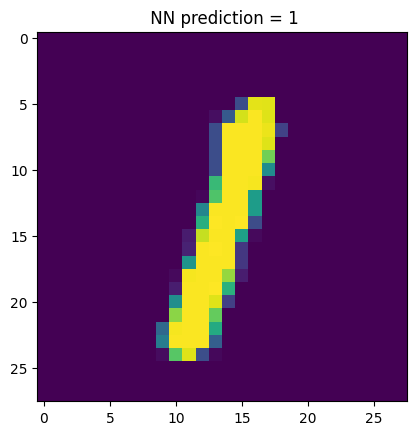

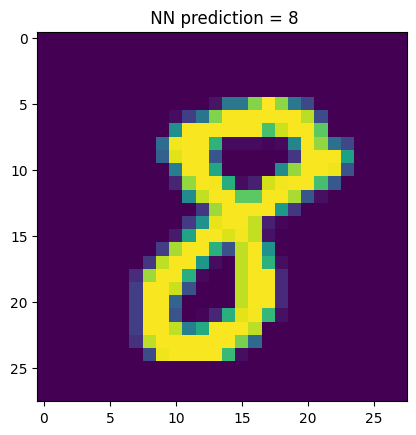

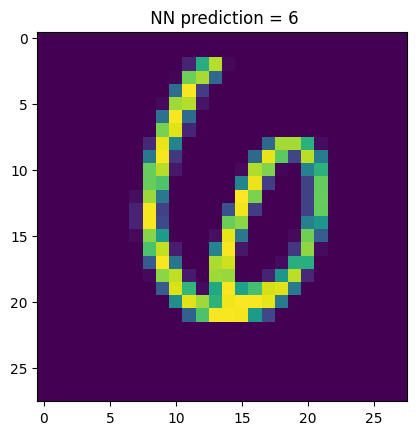

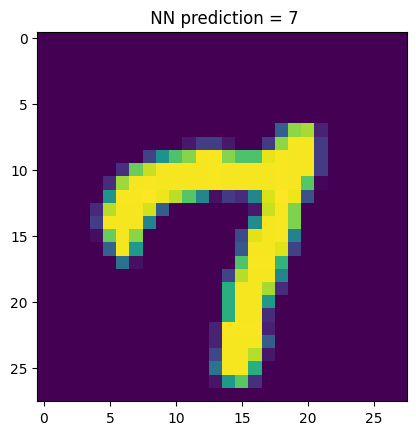

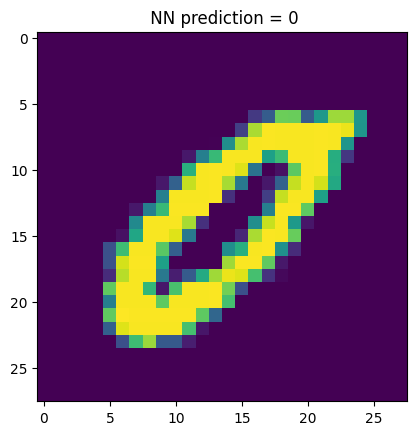

In [9]:
def TakesamplesfromNthBatch(loader,N,model):
    
    inputsout=[]
    labelsout=[]
    
    for i,data in enumerate(train_loader):
        inputs, labels = data
        inputsout=inputs.squeeze().numpy()
        labelsout=labels.numpy()    
           
        if i==N:
            prediction = model(inputs.to(device).view(-1, 784))
            predictionout = np.argmax(prediction.detach().cpu().numpy(),axis=1) 
            break

    return inputsout, labelsout, predictionout
trial_input,trial_labels,trial_prediction = TakesamplesfromNthBatch(train_loader,1,model)
print('Batch_Size= ', batch_size)

numberIntheBatch=0
Nofexamples=5
for i in range(Nofexamples):    
    
    plt.figure()
    imgplot = plt.imshow(trial_input[numberIntheBatch])
    plt.title(' NN prediction = %i'  %trial_prediction[numberIntheBatch])
    print('True Label = %i ' %trial_labels[numberIntheBatch])
    numberIntheBatch=numberIntheBatch+1